In [1]:
import cv2
import numpy as np
import os
import random

# Function to apply rotation and shear transformations to an image
def augment_image(image, angle_range=(-15, 15), shear_range=(-0.2, 0.2)):
    rows, cols, _ = image.shape

    # Random rotation
    angle = random.uniform(angle_range[0], angle_range[1])
    M_rot = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)

    # Random shear
    shear_x = random.uniform(shear_range[0], shear_range[1])
    shear_y = random.uniform(shear_range[0], shear_range[1])
    M_shear = np.array([[1, shear_x, 0], [shear_y, 1, 0]], dtype=np.float32)

    # Apply transformations
    image_rotated = cv2.warpAffine(image, M_rot, (cols, rows))
    image_sheared = cv2.warpAffine(image_rotated, M_shear, (cols, rows))

    return image_sheared

# Paths to the image directories
root_directory = "C:\\Users\\soura\\Downloads\\picz"  # Set this to your root directory containing subfolders
output_directory = "C:\\Users\\soura\\Downloads\\picz"  # Set this to where you want to save the augmented images

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Process each subfolder
for subfolder_name in os.listdir(root_directory):
    subfolder_path = os.path.join(root_directory, subfolder_name)
    if os.path.isdir(subfolder_path):
        output_subfolder_path = os.path.join(output_directory, subfolder_name)
        if not os.path.exists(output_subfolder_path):
            os.makedirs(output_subfolder_path)
        
        image_files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        
        for image_file in image_files:
            image_path = os.path.join(subfolder_path, image_file)
            image = cv2.imread(image_path)
            
            for i in range(1, 11):  # Generate 10 augmented images
                augmented_image = augment_image(image)
                output_image_path = os.path.join(output_subfolder_path, f'{subfolder_name}_{i}.jpg')
                cv2.imwrite(output_image_path, augmented_image)


# MODEL

In [53]:
import cv2
import mediapipe as mp
import os
import numpy as np

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands

# Function to process an image and extract hand keypoints
def extract_keypoints_from_image(image_path):
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = hands.process(image_rgb)
    
    keypoints_list = []
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            keypoints = np.array([(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark])
            keypoints_list.append(keypoints)
    
    hands.close()
    return keypoints_list

# Process all images in a directory
image_directory = "C:\\Users\\soura\\Downloads\\picz"  # Set this to your image directory
keypoints_directory = "C:\\Users\\soura\\Downloads\\junk"  # Set this to where you want to save the keypoints

if not os.path.exists(keypoints_directory):
    os.makedirs(keypoints_directory)

for image_name in os.listdir(image_directory):
    image_path = os.path.join(image_directory, image_name)
    keypoints_list = extract_keypoints_from_image(image_path)
    for i, keypoints in enumerate(keypoints_list):
        if keypoints.size > 0:
            keypoints_path = os.path.join(keypoints_directory, f'{os.path.splitext(image_name)[0]}_hand_{i+1}_keypoints.npy')
            np.save(keypoints_path, keypoints)


# GRAPH

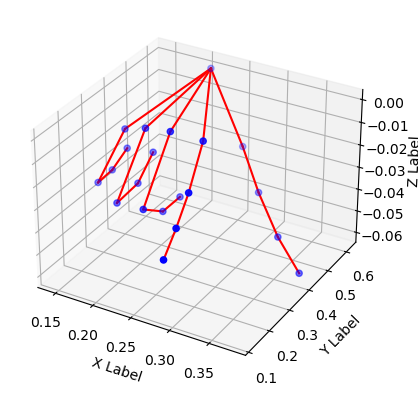

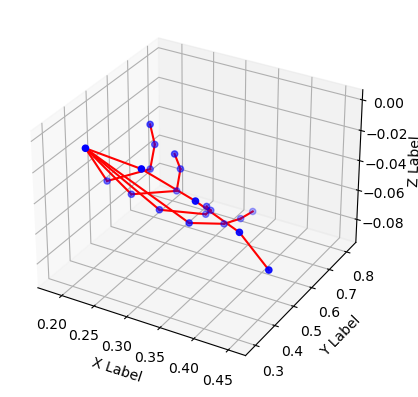

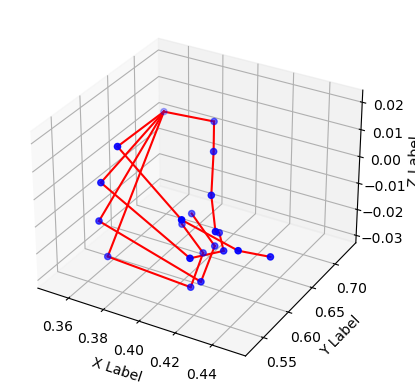

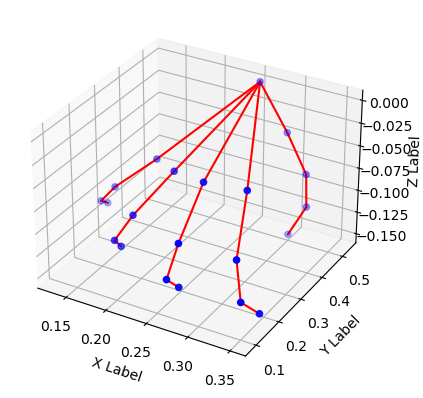

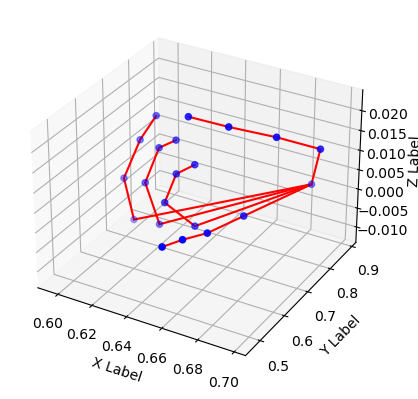

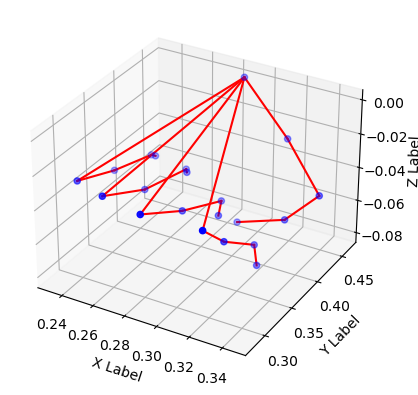

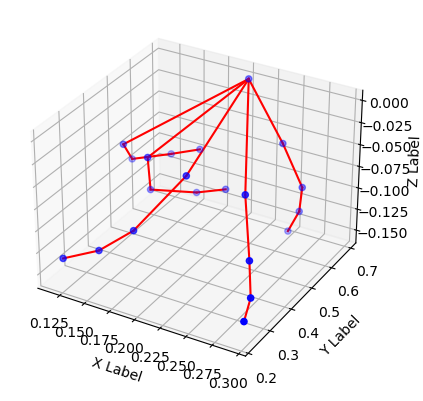

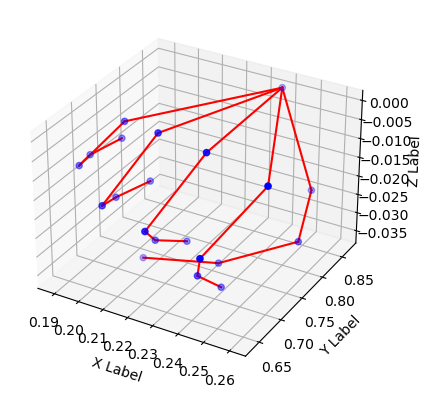

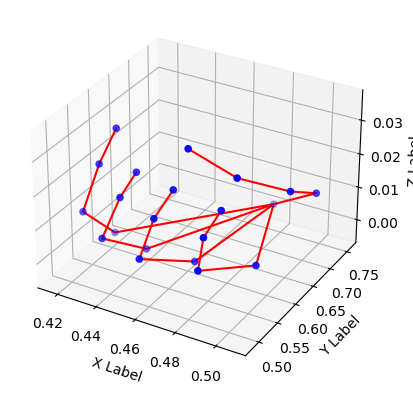

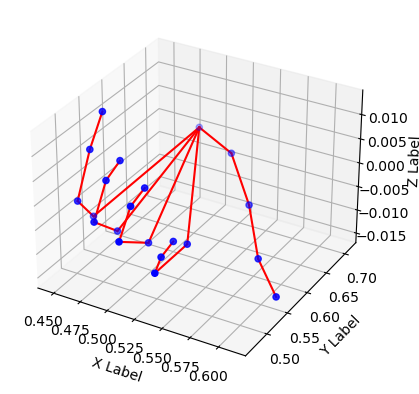

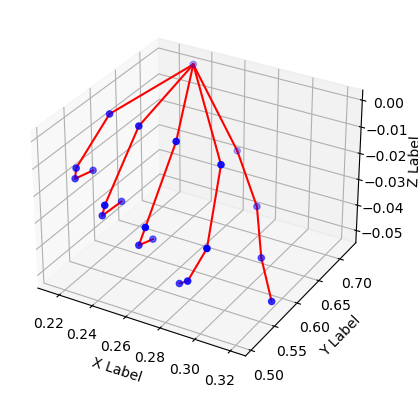

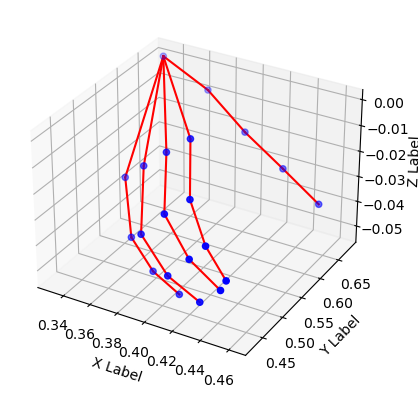

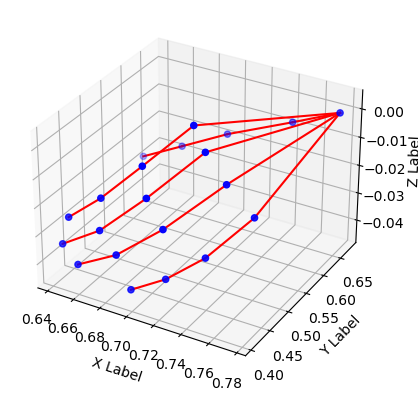

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to plot hand keypoints
def plot_hand_keypoints(keypoints):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract x, y, z coordinates
    x = keypoints[:, 0]
    y = keypoints[:, 1]
    z = keypoints[:, 2]
    
    # Define connections based on Mediapipe's hand landmark model
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),      # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),      # Index finger
        (0, 9), (9, 10), (10, 11), (11, 12), # Middle finger
        (0, 13), (13, 14), (14, 15), (15, 16), # Ring finger
        (0, 17), (17, 18), (18, 19), (19, 20) # Pinky finger
    ]
    
    for connection in connections:
        start, end = connection
        ax.plot([x[start], x[end]], [y[start], y[end]], [z[start], z[end]], 'r-')
    
    # Scatter plot of the keypoints
    ax.scatter(x, y, z, c='b', marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()

# Load and plot all keypoints files in a directory
keypoints_directory = "C:\\Users\\soura\\Downloads\\junk"  # Set this to where your keypoints are saved

for keypoints_file in os.listdir(keypoints_directory):
    keypoints_path = os.path.join(keypoints_directory, keypoints_file)
    keypoints = np.load(keypoints_path)
    plot_hand_keypoints(keypoints)
